In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv('/content/drive/MyDrive/Natural Language Processing with Disaster Tweets/data/train (3).csv')

In [37]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [38]:
df = df.sample(n=5000)

<Axes: xlabel='target', ylabel='count'>

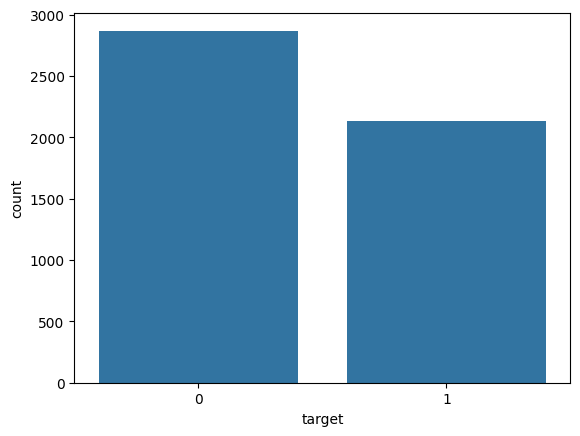

In [39]:
import seaborn as sns
sns.countplot(data=df,x='target')

In [40]:
data=df[['text','target']]
data.head()

,text,target
3049,USGS EQ: M 1.9 - 15km E of Anchorage Alaska: T...,1
4474,@minhazmerchant Great job done by village host...,1
6650,Three Israeli soldiers wounded in West Bank te...,1
4827,http://t.co/c1H7JECFrV @RoyalCarribean do your...,1
5725,VIDEO: 'We're picking up bodies from water': R...,1


In [41]:
pd.options.mode.chained_assignment = None
data['target'] = data['target'].replace(4,1)
data['target'].value_counts()

,count
target,
0,2869
1,2131


In [42]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
dataset = pd.concat([data_pos, data_neg])
dataset.shape

(5000, 2)

In [43]:
dataset['text']=dataset['text'].str.lower()
dataset.head()

,text,target
3049,usgs eq: m 1.9 - 15km e of anchorage alaska: t...,1
4474,@minhazmerchant great job done by village host...,1
6650,three israeli soldiers wounded in west bank te...,1
4827,http://t.co/c1h7jecfrv @royalcarribean do your...,1
5725,video: 'we're picking up bodies from water': r...,1


In [44]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [45]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

,text
3049,usgs eq: 1.9 - 15km e anchorage alaska: time20...
4474,@minhazmerchant great job done village hostages
6650,three israeli soldiers wounded west bank terro...
4827,http://t.co/c1h7jecfrv @royalcarribean passeng...
5725,video: 'we're picking bodies water': rescuers ...


In [46]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

,text
6991,reasons brain twister oneself discount redesig...
4791,auspol see resemblance abbott amp campbell lou...
6684,one thing like thunder heheh
4427,im hungry hostage
3121,queer sultry summer summer electrocuted rosenb...


In [47]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

,text
6991,reasons brain twister oneself discount redesig...
4791,auspol see resemblance abbott amp campbell lou...
6684,one thing like thunder heheh
4427,im hungry hostage
3121,queer sultry summer summer electrocuted rosenb...


In [48]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

,text
6991,reasons brain twister oneself discount redesig...
4791,auspol see resemblance abbott amp campbell lou...
6684,one thing like thunder heheh
4427,im hungry hostage
3121,queer sultry summer summer electrocuted rosenb...


In [49]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

,text
6991,reasons brain twister oneself discount redesig...
4791,auspol see resemblance abbott amp campbell lou...
6684,one thing like thunder heheh
4427,im hungry hostage
3121,queer sultry summer summer electrocuted rosenb...


In [50]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences # use tensorflow.keras.utils for pad_sequences
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)

In [51]:
import nltk
from functools import lru_cache
st = nltk.PorterStemmer()
stem = lru_cache(maxsize=50000)(st.stem)
def stemming_on_text(data):
    text = [stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

,text
3049,"[usgs, eq, km, e, anchorage, alaska, time, utc..."
4474,"[minhazmerchant, great, job, done, village, ho..."
6650,"[three, israeli, soldiers, wounded, west, bank..."
4827,"[httptcohjecfrv, royalcarribean, passengers, k..."
5725,"[video, were, picking, bodies, water, rescuers..."


In [52]:
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
lm = nltk.WordNetLemmatizer()
lemmatize = lru_cache(maxsize=50000)(lm.lemmatize)
def lemmatizer_on_text(data):
    text = [lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

,text
3049,"[usgs, eq, km, e, anchorage, alaska, time, utc..."
4474,"[minhazmerchant, great, job, done, village, ho..."
6650,"[three, israeli, soldiers, wounded, west, bank..."
4827,"[httptcohjecfrv, royalcarribean, passengers, k..."
5725,"[video, were, picking, bodies, water, rescuers..."


In [54]:
dataset.head()

,text,target
3049,"[usgs, eq, km, e, anchorage, alaska, time, utc...",1
4474,"[minhazmerchant, great, job, done, village, ho...",1
6650,"[three, israeli, soldiers, wounded, west, bank...",1
4827,"[httptcohjecfrv, royalcarribean, passengers, k...",1
5725,"[video, were, picking, bodies, water, rescuers...",1


In [55]:
dataset[dataset['target']==0]['text']

,text
1464,"[borrowers, concerned, possible, interest, rat..."
704,"[srajapakse, thank, missy, thought, suited, bl..."
5381,"[montetjwitte, nolesfan, nutsandboltssp, say, ..."
2834,"[circular, ruins, displaced, part, httptcoodra..."
4832,"[httptcofhiqbpwfh, fredolsencruise, please, ta..."
...,...
6991,"[reasons, brain, twister, oneself, discount, r..."
4791,"[auspol, see, resemblance, abbott, amp, campbe..."
6684,"[one, thing, like, thunder, heheh]"
4427,"[im, hungry, hostage]"


In [56]:
words = set()
for data in dataset['text']:
    for word in data:
        words.add(word)

len(words)

16170

In [57]:
new_data=dataset
new_data['text'] = dataset['text'].apply(lambda x: ' '.join(x) )
new_data.head()

,text,target
3049,usgs eq km e anchorage alaska time utc httptco...,1
4474,minhazmerchant great job done village hostages,1
6650,three israeli soldiers wounded west bank terro...,1
4827,httptcohjecfrv royalcarribean passengers know ...,1
5725,video were picking bodies water rescuers searc...,1


In [58]:
max_features = len(words)
tokenizer_keras = Tokenizer(num_words=max_features, split=' ')
tokenizer_keras.fit_on_texts(new_data['text'].values)
X = tokenizer_keras.texts_to_sequences(new_data['text'].values)
X = pad_sequences(X)
y = pd.get_dummies(new_data['target']).values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [60]:
print("Training data percentage:", len(X_train) / len(X) * 100)
print("Testing data percentage:", len(X_test) / len(X) * 100)
print("Validation data percentage:", len(X_val) / len(X) * 100)


Training data percentage: 80.0
Testing data percentage: 10.0
Validation data percentage: 10.0


In [62]:
# prompt: here use lstm with accuracy and confusion matrix

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the LSTM model
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6266 - loss: 0.6460 - val_accuracy: 0.7700 - val_loss: 0.4840
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8931 - loss: 0.2797 - val_accuracy: 0.7480 - val_loss: 0.5536
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9666 - loss: 0.0978 - val_accuracy: 0.7620 - val_loss: 0.7870
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9911 - loss: 0.0344 - val_accuracy: 0.7620 - val_loss: 0.9648
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9954 - loss: 0.0212 - val_accuracy: 0.7540 - val_loss: 1.0165
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9970 - loss: 0.0115 - val_accuracy: 0.7220 - val_loss: 1.0885
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9978 - loss: 0.0110 - val_accuracy: 0.7460 - val_loss: 1.1073
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9968 - loss: 0.0107 - val_accu